In [3]:
import eeg_decoder
import numpy as np
from collections import OrderedDict
%load_ext autoreload
%autoreload 2

In [4]:
experiment_name = 'e'
data_dir = f'./data/{experiment_name}'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False,trim_timepoints=[-200,1500])

In [5]:
time_window = 25 
time_step = 25
trial_bin_size = 15 
n_splits = 100
group_dict = OrderedDict([('1 Color',[11]),('2 Color',[12]),('1 Motion',[21]),('2 Motion',[22])])
wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_bin_size,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub,num_labels=2)

In [4]:
for isub in range(exp.nsub):

    print(isub)
    xdata,ydata = exp.load_eeg(isub)

    xdata_color, ydata_color = wrangl.select_labels(xdata,ydata,labels=[group_dict['1 Color'],group_dict['2 Color']])
    xdata_motion, ydata_motion = wrangl.select_labels(xdata,ydata,labels=[group_dict['1 Motion'],group_dict['2 Motion']])
    xdata_color, ydata_color = wrangl.group_labels(xdata_color, ydata_color)
    xdata_motion, ydata_motion = wrangl.group_labels(xdata_motion, ydata_motion)

    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_custom_split(xdata_color,xdata_motion,ydata_color,ydata_motion):

        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)


0
1
2
3
4
5
6
7
8


In [7]:
interp = eeg_decoder.Interpreter(clfr, subtitle='color_to_motion') 
interp.save_results()

In [18]:
interp.load_results('color_to_motion')

Significant timepoints: [ 112  136  160  184  208  232  256  280  304  328  352  376  400  424
  448  472  496  520  544  568  592  616  640  664  688  712  736  760
  784  808  832  856  880  904  928  952  976 1000 1024 1048 1072 1096
 1120 1144 1168 1192 1216 1240 1264 1288 1312 1336 1360 1384 1408 1432
 1456]
Saving output\figures\motion_to_coloracc.pdf
Saving output\figures\motion_to_coloracc.png
Mean delay accuracy: 0.6758611111111111
Mean delay S.D.: 0.033627395045273206


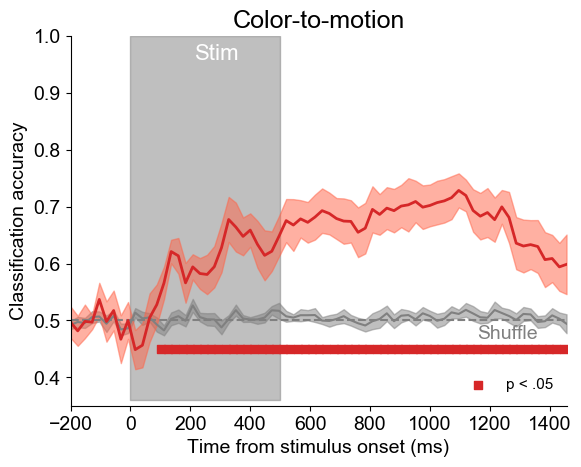

In [19]:
import matplotlib.pyplot as plt
interp.chance = .5
interp.labels = [0,1]
interp.plot_acc(significance_testing=True,savefig=True,
                ylim=[0.35,1],chance_text_y=.22,
                title='Color-to-motion',stim_time=[0,500])
plt.show()

In [9]:
for isub in range(exp.nsub):

    print(isub)
    xdata,ydata = exp.load_eeg(isub)

    xdata_color, ydata_color = wrangl.select_labels(xdata,ydata,labels=[group_dict['1 Color'],group_dict['2 Color']])
    xdata_motion, ydata_motion = wrangl.select_labels(xdata,ydata,labels=[group_dict['1 Motion'],group_dict['2 Motion']])
    xdata_color, ydata_color = wrangl.group_labels(xdata_color, ydata_color)
    xdata_motion, ydata_motion = wrangl.group_labels(xdata_motion, ydata_motion)

    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_custom_split(xdata_motion,xdata_color,ydata_motion,ydata_color):

        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)


0
1
2
3
4
5
6
7
8


In [10]:
interp = eeg_decoder.Interpreter(clfr, subtitle='motion_to_color') 
interp.save_results()

In [14]:
interp.load_results('motion_to_color')

Significant timepoints: [ 136  160  232  304  328  352  376  400  424  448  472  496  520  544
  568  592  616  640  664  688  712  736  760  784  808  832  856  880
  904  928  952  976 1000 1024 1048 1072 1096 1120 1144 1168 1192 1216
 1240 1288]
Saving output\figures\motion_to_coloracc.pdf
Saving output\figures\motion_to_coloracc.png
Mean delay accuracy: 0.6242222222222222
Mean delay S.D.: 0.036985576518020785


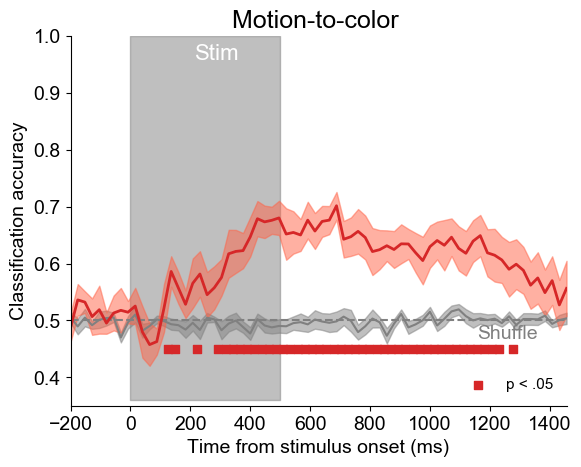

In [17]:
import matplotlib.pyplot as plt
interp.chance = .5
interp.labels = [0,1]
interp.plot_acc(significance_testing=True,savefig=True,
                ylim=[0.35,1],chance_text_y=.22,
                title='Motion-to-color ',stim_time=[0,500])
plt.show()

# Across feature

In [6]:
interp_color_to_motion = eeg_decoder.Interpreter()
interp_color_to_motion.load_results(filename = 'color_to_motion')
interp_motion_to_color = eeg_decoder.Interpreter()
interp_motion_to_color.load_results('motion_to_color')

interp_color = eeg_decoder.Interpreter()
interp_color.load_results('color')
interp_color.acc = interp_color.acc
interp_color.acc_shuff = interp_color.acc_shuff
interp_motion = eeg_decoder.Interpreter()
interp_motion.load_results('motion')

# color

In [8]:
# Combine acc matrices for plotting
interp_color.acc = np.concatenate([interp_color.acc[:,np.newaxis],interp_motion_to_color.acc[:,np.newaxis]],1)
interp_color.acc_shuff = np.concatenate([interp_color.acc_shuff[:,np.newaxis],interp_motion_to_color.acc_shuff[:,np.newaxis]],1)

Within-color mean delay accuracy: 0.6352569444444445
Within-color mean delay S.D.: 0.035131113956492654
Motion-to-color mean delay accuracy: 0.6242222222222222
Motion-to-color mean delay S.D.: 0.036985576518020785
mean delay accuracy: 0.6242222222222222
mean delay S.D.: 0.036985576518020785
Saving output\figures\accwithin_color_and_motion_to_color.pdf
Saving output\figures\accwithin_color_and_motion_to_color.png


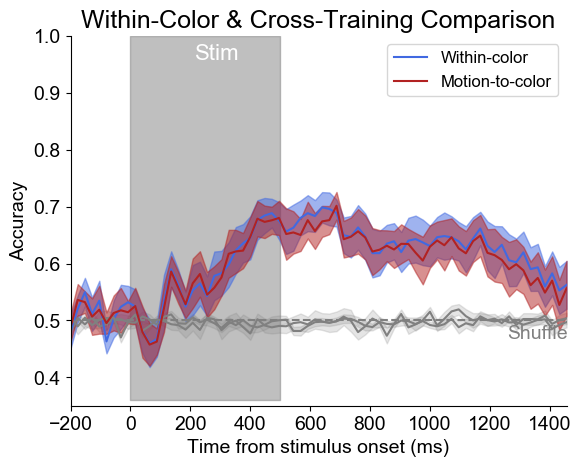

In [16]:
interp_color.plot_acc_compare_subset(
    subset_list=['Within-color','Motion-to-color'],
    ylim=[.35,1], 
    chance=.5, 
    chance_text_y=.22,
    stim_time=[0,500],
    significance_testing=True,
    subtitle='within_color_and_motion_to_color',
    title='Within-Color & Cross-Training Comparison',
    savefig=True)

# motion 

In [17]:
# Combine acc matrices for plotting
interp_motion.acc = np.concatenate([interp_motion.acc[:,np.newaxis],interp_color_to_motion.acc[:,np.newaxis]],1)
interp_motion.acc_shuff = np.concatenate([interp_motion.acc_shuff[:,np.newaxis],interp_color_to_motion.acc_shuff[:,np.newaxis]],1)

Within-motion mean delay accuracy: 0.6352569444444445
Within-motion mean delay S.D.: 0.035131113956492654
Color-to-motion mean delay accuracy: 0.6242222222222222
Color-to-motion mean delay S.D.: 0.036985576518020785
mean delay accuracy: 0.6242222222222222
mean delay S.D.: 0.036985576518020785
Saving output\figures\accwithin_motion_and_color_to_motion.pdf
Saving output\figures\accwithin_motion_and_color_to_motion.png


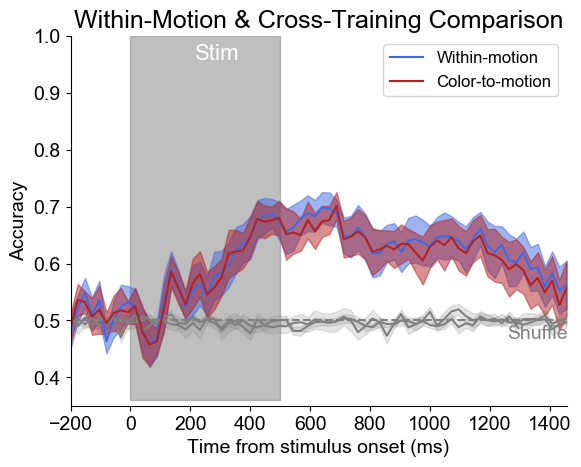

In [19]:
interp_color.plot_acc_compare_subset(
    subset_list=['Within-motion','Color-to-motion'],
    ylim=[.35,1], 
    chance=.5, 
    chance_text_y=.22,
    stim_time=[0,500],
    significance_testing=True,
    subtitle='within_motion_and_color_to_motion',
    title='Within-Motion & Cross-Training Comparison',
    savefig=True)